## Novel Corona virus Spread

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
# import plotly.express as px
# import plotly.graph_objs as go
# import plotly.figure_factory as ff
import calmap

In [3]:
import warnings
warnings.filterwarnings('ignore')

from IPython.display import Javascript
from IPython.core.display import display, HTML

In [4]:
import json
import random
from urllib.request import urlopen

In [5]:
full_dataset = pd.read_csv("covid_19_data.csv", parse_dates=['ObservationDate'])

In [12]:
#pending cases are those which are not dead and not yet recovered
full_dataset['Pending'] = full_dataset['Confirmed'] - full_dataset['Deaths'] - full_dataset['Recovered']
full_dataset['Province/State'] = full_dataset["Province/State"].fillna(" ")

In [13]:
full_dataset.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Pending
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1,0,0,1
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14,0,0,14
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6,0,0,6
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1,0,0,1
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0,0,0,0


In [14]:
full_dataset.isnull().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
Pending            0
dtype: int64

In [15]:
full_dataset.shape

(4935, 9)

## Analysis based on Country/Region 

In [16]:
country_data = full_dataset.groupby('Country/Region')['Confirmed','Deaths','Recovered','Pending'].sum().reset_index()

In [17]:
temp_c = country_data.sort_values(by='Confirmed',ascending=False)
temp_c = temp_c.reset_index(drop=True)
temp_c.style.background_gradient(cmap='Reds')

,Country/Region,Confirmed,Deaths,Recovered,Pending
0,Mainland China,2554465,80616,961283,1512566
1,South Korea,80824,529,1496,78799
2,Italy,66824,3239,5454,58131
3,Iran,54206,1912,15142,37152
4,Others,17780,102,619,17059
5,France,9688,177,234,9277
6,Germany,8857,7,368,8482
7,Spain,7619,155,349,7115
8,Japan,7040,118,1034,5888
9,US,5505,176,174,5155


## Scatter Plot of Confirmed Cases vs Deaths in a country except china

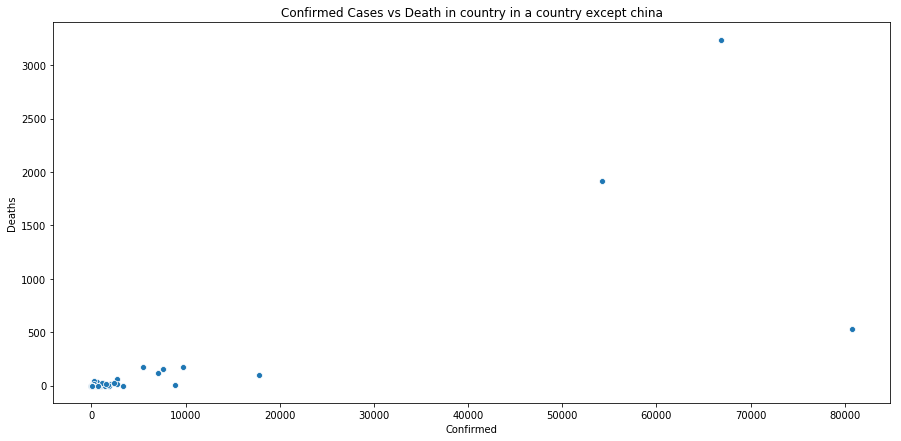

In [18]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='Confirmed',y='Deaths',data=country_data[country_data['Country/Region'] != "Mainland China"])
plt.title("Confirmed Cases vs Death in country in a country except china")
plt.show()

## Confirmed cases of country with zero deaths

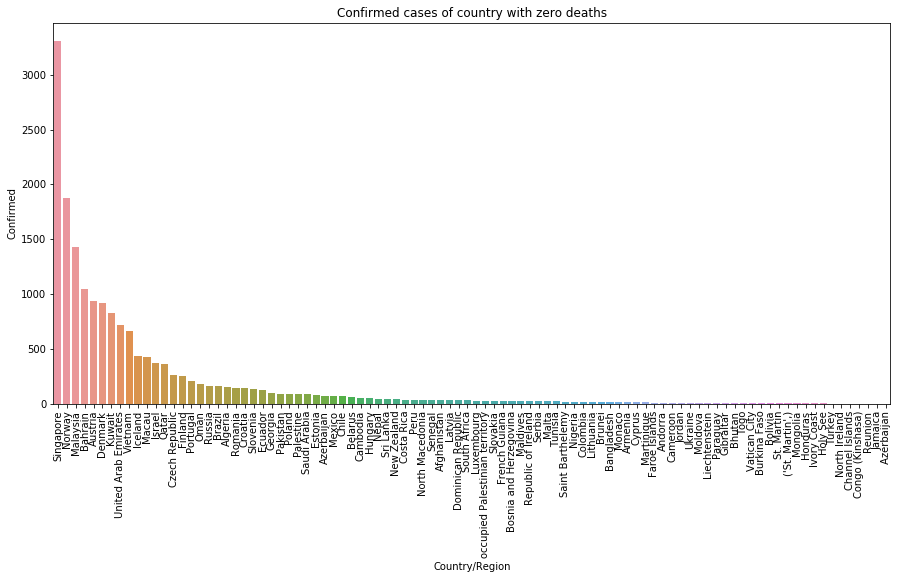

In [19]:
temp_a = country_data[country_data['Deaths'] == 0].sort_values(by="Confirmed",ascending=False)
plt.figure(figsize=(15,7))
ax=sns.barplot(x='Country/Region',y='Confirmed',data=temp_a)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Confirmed cases of country with zero deaths")
plt.show()

singapore has highest number of confirmed cases with no death

## Confimed cases with more than one death 

In [20]:
temp_b = country_data[country_data["Deaths"] != 0].sort_values(by="Confirmed").reset_index(drop=True)
temp_b.style.background_gradient(cmap='Reds')

,Country/Region,Confirmed,Deaths,Recovered,Pending
0,Panama,9,1,0,8
1,Bulgaria,19,1,0,18
2,Morocco,21,2,0,19
3,Albania,24,1,0,23
4,Argentina,73,4,0,69
5,Indonesia,102,1,4,97
6,Ireland,170,1,0,169
7,Philippines,220,39,31,150
8,Egypt,280,4,50,226
9,San Marino,288,11,0,277


### country where all dies

In [21]:
temp_c = country_data[country_data["Confirmed"] == country_data["Deaths"]]
temp_c.style.background_gradient(cmap='Reds')

,Country/Region,Confirmed,Deaths,Recovered,Pending


there are no country where all the confirmed cases died

###  death rate percentage in countries

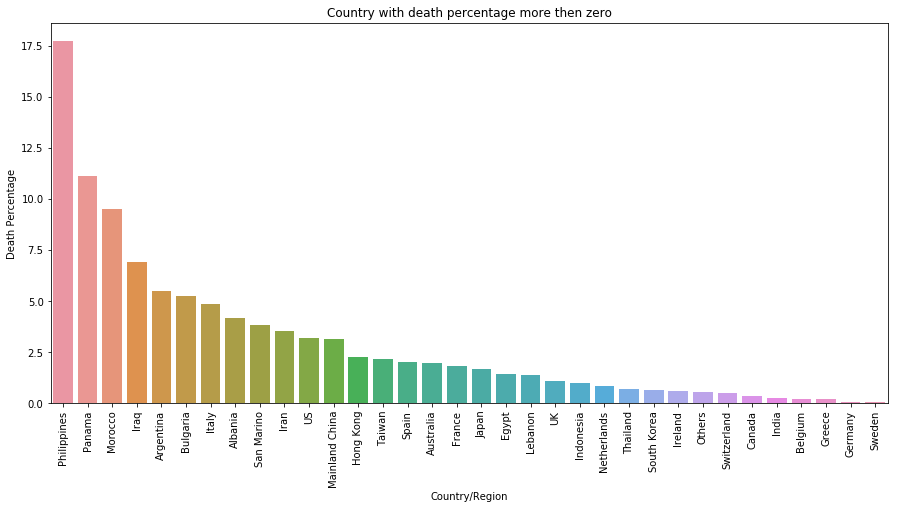

In [22]:
temp_d = country_data.copy()
temp_d["Death Percentage"] = (country_data["Deaths"]*100)/(country_data["Confirmed"])
temp_d = temp_d.sort_values(by='Death Percentage',ascending=False).reset_index(drop=True)
temp_d = temp_d[temp_d["Death Percentage"]>0]
plt.figure(figsize=(15,7))
ax=sns.barplot(x='Country/Region',y='Death Percentage',data=temp_d)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Country with death percentage more then zero")
plt.show()

philippines have very high death rate

### recovery rate in countries

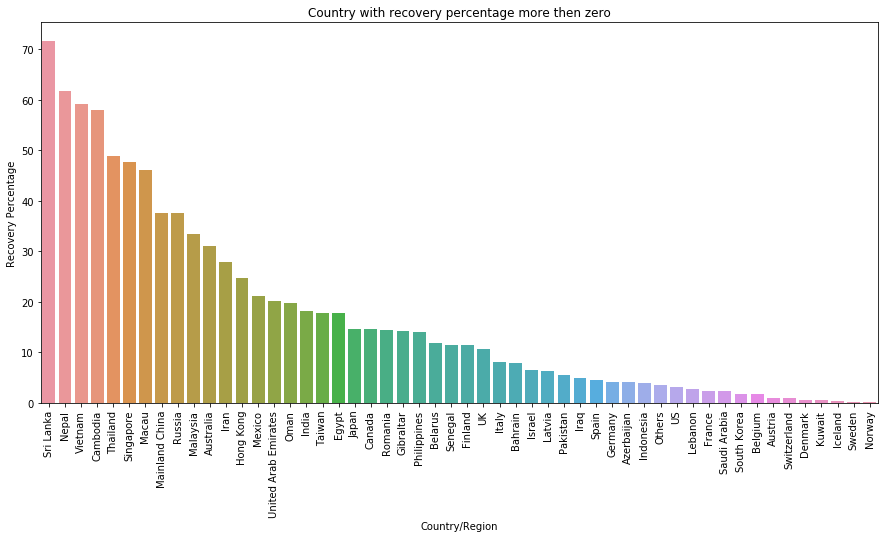

In [23]:
temp_e = country_data.copy()
temp_e["Recovery Percentage"] = (country_data["Recovered"]*100)/(country_data["Confirmed"])
temp_e = temp_e.sort_values(by='Recovery Percentage',ascending=False).reset_index(drop=True)
temp_e = temp_e[temp_e["Recovery Percentage"]>0]
plt.figure(figsize=(15,7))
ax=sns.barplot(x='Country/Region',y='Recovery Percentage',data=temp_e)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Country with recovery percentage more then zero")
plt.show()

# Time Series Analysis

## cases over time

In [24]:
full_dataset.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Pending
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1,0,0,1
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14,0,0,14
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6,0,0,6
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1,0,0,1
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0,0,0,0


In [25]:
dates_data = full_dataset.groupby("ObservationDate")["Confirmed","Deaths","Recovered","Pending"].sum().reset_index()

In [26]:
dates_data.head()

,ObservationDate,Confirmed,Deaths,Recovered,Pending
0,2020-01-22,555,17,28,510
1,2020-01-23,653,18,30,605
2,2020-01-24,941,26,36,879
3,2020-01-25,1438,42,39,1357
4,2020-01-26,2118,56,52,2010


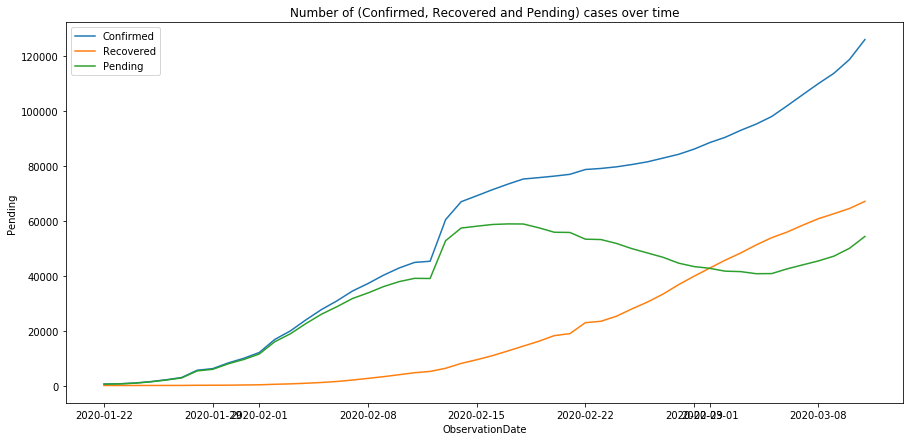

In [27]:
plt.figure(figsize=(15,7))
sns.lineplot(x = 'ObservationDate',y='Confirmed',data=dates_data,label="Confirmed")
sns.lineplot(x = 'ObservationDate',y='Recovered',data=dates_data,label="Recovered")
sns.lineplot(x = 'ObservationDate',y='Pending',data=dates_data,label="Pending")
plt.title("Number of (Confirmed, Recovered and Pending) cases over time")
plt.show()

### Number of death percentage and recovery percentage over time

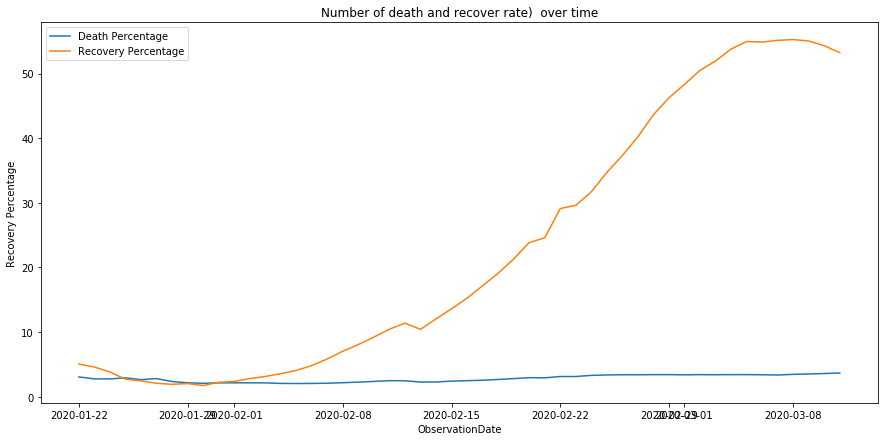

In [28]:
temp_f = dates_data.copy()
temp_f["Death Percentage"] = (dates_data["Deaths"]*100)/(dates_data["Confirmed"])
temp_f["Recovery Percentage"] = (dates_data["Recovered"]*100)/(dates_data["Confirmed"])
plt.figure(figsize=(15,7))
sns.lineplot(x = 'ObservationDate',y='Death Percentage',data=temp_f,label="Death Percentage")
sns.lineplot(x = 'ObservationDate',y='Recovery Percentage',data=temp_f,label="Recovery Percentage")
plt.title("Number of death and recover rate)  over time")
plt.show()

## Number of countries with confirmed cases over time

In [29]:
temp_g = full_dataset[full_dataset["Confirmed"]!=0].groupby(["ObservationDate"])["Country/Region"].unique().apply(len)

In [30]:
temp_g = pd.DataFrame(temp_g).reset_index()

In [31]:
# temp_g.head()

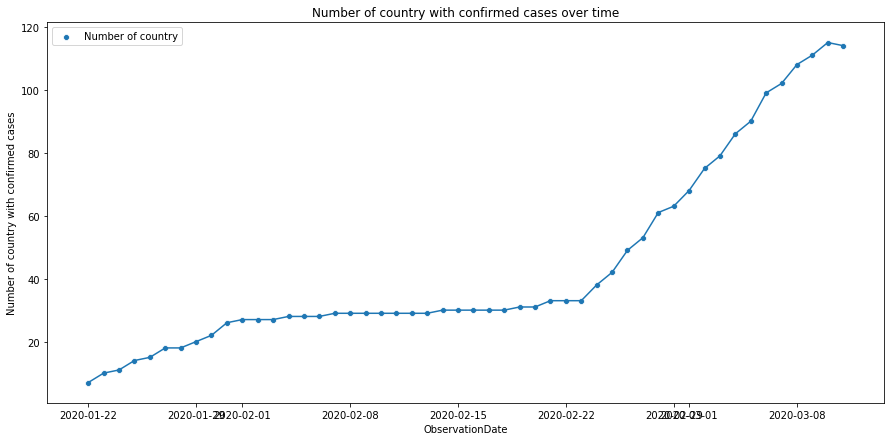

In [32]:
plt.figure(figsize=(15,7))
sns.lineplot(x = 'ObservationDate',y='Country/Region',data=temp_g)
sns.scatterplot(x = 'ObservationDate',y='Country/Region',data=temp_g,label="Number of country")
plt.ylabel("Number of country with confirmed cases")
plt.title("Number of country with confirmed cases over time")
plt.show()

## Analysis of top 15 countries in each attribute

### Top 15 countries with confirmed cases

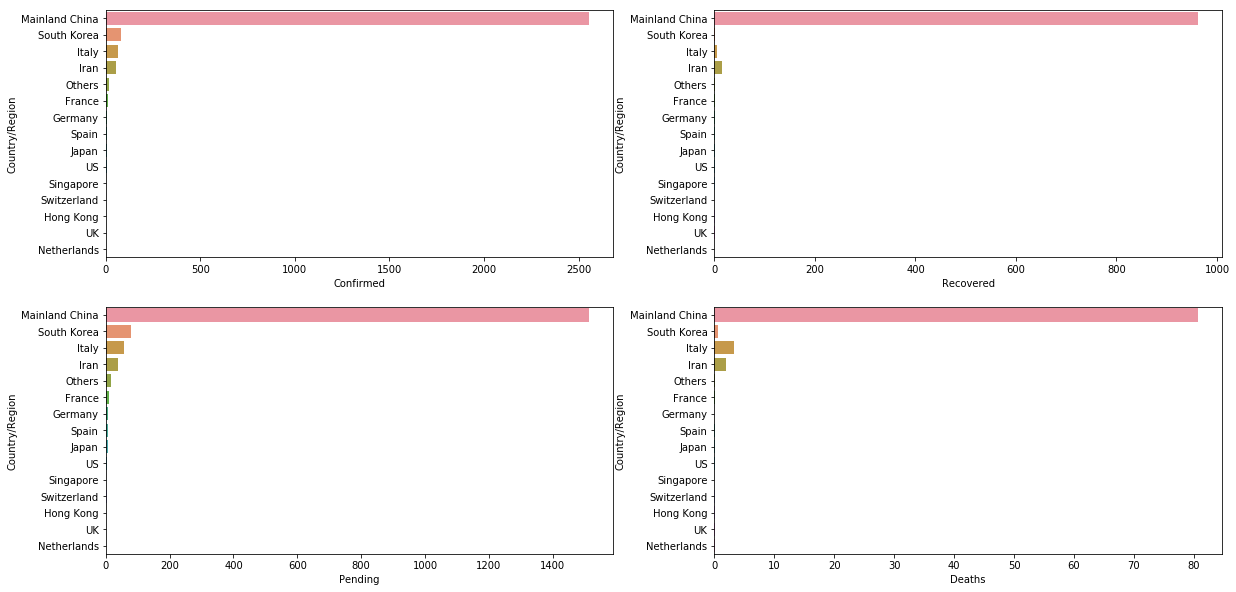

In [53]:
temp_h = country_data.sort_values(by='Confirmed',ascending=False).head(15)
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.barplot(x=temp_h["Confirmed"]/1000,y=temp_h["Country/Region"])
plt.subplot(222)
sns.barplot(x=temp_h["Recovered"]/1000,y=temp_h["Country/Region"])
plt.subplot(223)
sns.barplot(x=temp_h["Pending"]/1000,y=temp_h["Country/Region"])
plt.subplot(224)
sns.barplot(x=temp_h["Deaths"]/1000,y=temp_h["Country/Region"])
plt.show()



# Time Series Analysis

## Time Series Forecasting of number of confirmed after 5 days

In [444]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


In [482]:
def fit_time_series_model(model,X_train,y_train):
    model = model()
    model.fit(X_train,y_train)
    return model

def predict_time_series_model(model,X_test):
    y_pred = model.predict(X_test)
    return y_pred

def plot_time_series(X_train,X_test,y_pred):
    plt.figure(figsize=(15,7))
    sns.lineplot(X_train["ObservationDate"],y_train,label="Training Data")
    sns.lineplot(X_test["ObservationDate"],y_test.values,color='red',label="Test Data")
    sns.lineplot(X_test["ObservationDate"],y_pred,color='yellow',label="Prediction Data")
    plt.title("Time series forecasting of confirmed case")
    plt.show()



def train_test(X,y):
    X_train = X[:int(X.shape[0]*0.6)]
    X_test = X[int(X.shape[0]*0.6):]
    y_train = y[:int(X.shape[0]*0.6)]
    y_test = y[int(X.shape[0]*0.6):]
    return X_train,X_test,y_train,y_test

def make_shift(X,y,column):
    
    
    X[column+"1"] = X[column].shift(-1)
    X[column+"2"] = X[column+"1"].shift(-1)
    X[column+"3"] = X[column+"2"].shift(-1)
    X[column+"4"] = X[column+"3"].shift(-1)
    X = X[:-5]
    
    
    y = y[column].shift(-5)
    y = y[:-5]                     
                      
    return X,y



In [484]:
X,y = make_shift(dates_data[["ObservationDate","Confirmed"]],dates_data[["ObservationDate","Confirmed"]],"Confirmed") 

In [485]:
X_train,X_test,y_train,y_test = train_test(X,y)

In [487]:
model = fit_time_series_model(RandomForestRegressor,X_train.values[:,1:],y_train)

In [497]:
y_pred = predict_time_series_model(model,X_test.values[:,1:])

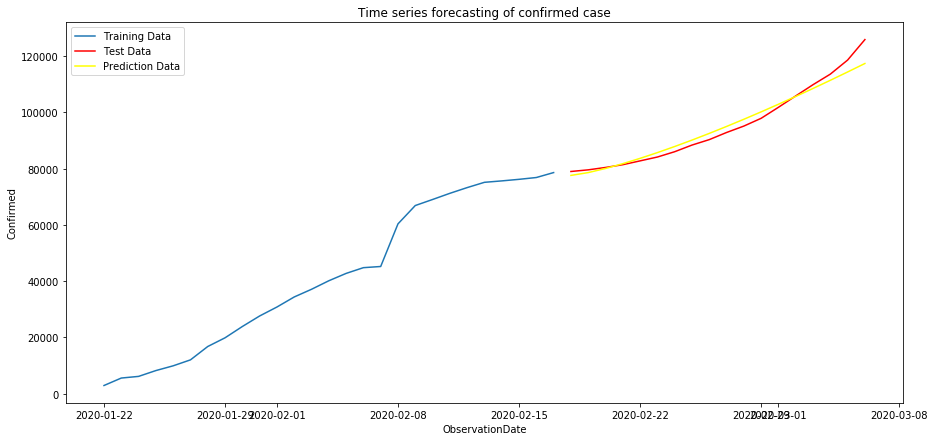

In [499]:
plot_time_series(X_train,X_test,y_pred)

## Time Series Forecasting of number of death after 5 days

In [501]:
X,y = make_shift(dates_data[["ObservationDate","Deaths"]],dates_data[["ObservationDate","Deaths"]],"Deaths") 

In [502]:
X_train,X_test,y_train,y_test = train_test(X,y)

In [503]:
model = fit_time_series_model(RandomForestRegressor,X_train.values[:,1:],y_train)

In [512]:
y_pred = predict_time_series_model(model,X_test.values[:,1:])

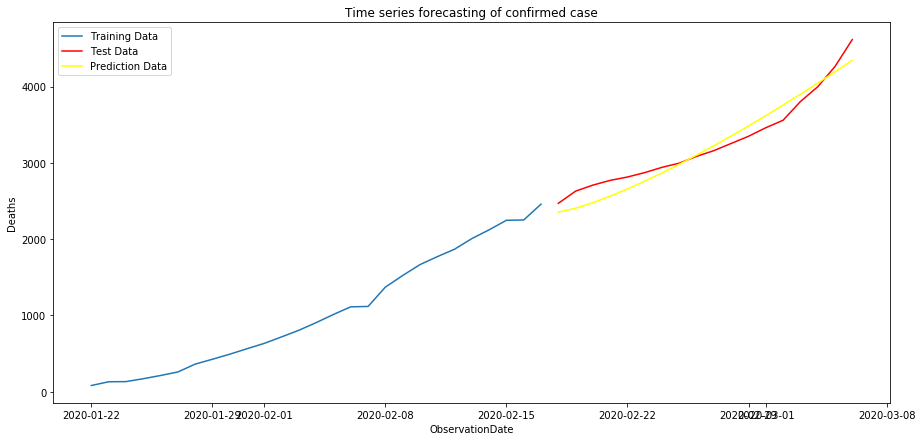

In [514]:
plot_time_series(X_train,X_test,y_pred)